In [1]:
import keras
import gpflow
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import models

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [7]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Fit the model
history = model.fit(x_train, y_train, validation_split=0.20, epochs=10, batch_size=128, verbose=1)
# list all data in history
print(history.history.keys())

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 396us/step - loss: 1.6046 - acc: 0.6346 - val_loss: 0.3373 - val_acc: 0.9036
Epoch 2/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.2490 - acc: 0.9271 - val_loss: 0.1656 - val_acc: 0.9511
Epoch 3/10
48000/48000 [==============================] - 20s 408us/step - loss: 0.1478 - acc: 0.9557 - val_loss: 0.1316 - val_acc: 0.9612
Epoch 4/10
48000/48000 [==============================] - 19s 393us/step - loss: 0.1104 - acc: 0.9662 - val_loss: 0.1203 - val_acc: 0.9671
Epoch 5/10
48000/48000 [==============================] - 19s 403us/step - loss: 0.0922 - acc: 0.9709 - val_loss: 0.1058 - val_acc: 0.9695
Epoch 6/10
48000/48000 [==============================] - 19s 406us/step - loss: 0.0765 - acc: 0.9762 - val_loss: 0.0963 - val_acc: 0.9730
Epoch 7/10
48000/48000 [==============================] - 19s 396us/step - loss: 0.0669 - acc: 0.9790 - val_loss: 0.

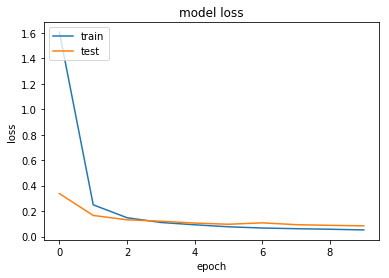

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

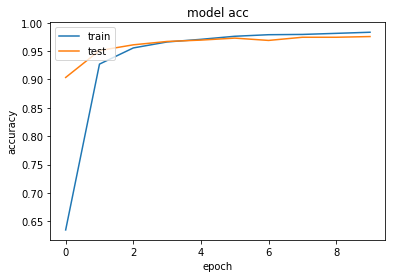

In [10]:
# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 168us/step


[0.080421543603367174, 0.97799999999999998]

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2890      
Total params: 4,210
Trainable params: 4,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
layer_outputs = [layer.output for layer in model.layers] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

(1, 26, 26, 16)


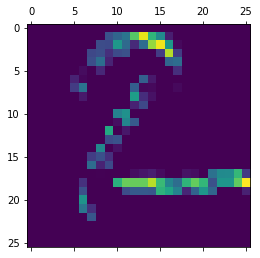

In [14]:
activations = activation_model.predict(x_test[1].reshape(1,28,28,1))
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [15]:
len(activations)

5

In [16]:
def visualize_layers(activations):
    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

    layer_names = ['conv2d_6', 'max_pooling2d_1', 'conv2d_7']
    images_per_row = 8

    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

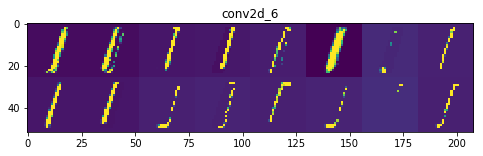

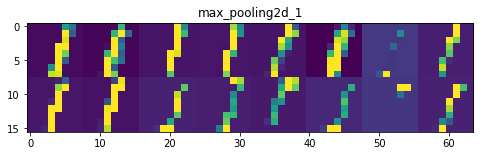

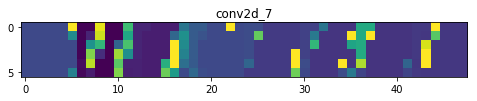

In [17]:
activations = activation_model.predict(x_test[2].reshape(1,28,28,1))
visualize_layers(activations)

C:\Users\Miguel\Anaconda3\envs\gpflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


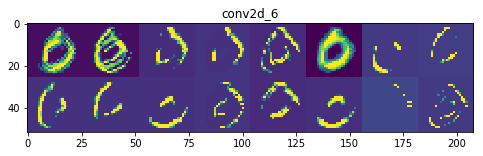

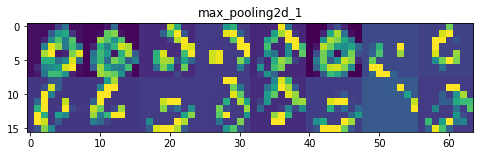

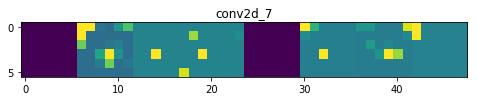

In [18]:
activations = activation_model.predict(x_test[3].reshape(1,28,28,1))
visualize_layers(activations)

C:\Users\Miguel\Anaconda3\envs\gpflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


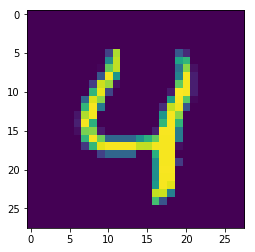

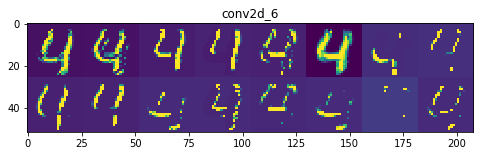

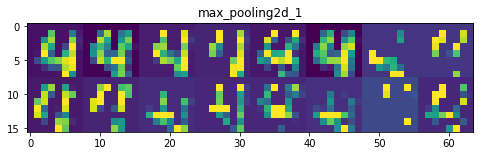

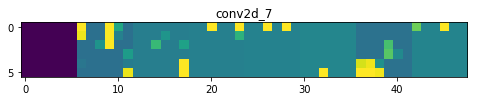

In [19]:
activations = activation_model.predict(x_test[4].reshape(1,28,28,1))
plt.imshow(x_test[4].reshape(28,28))
visualize_layers(activations)

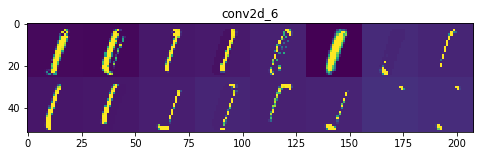

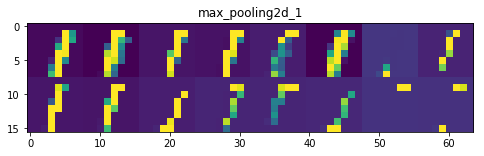

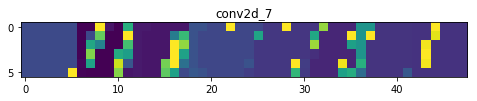

In [20]:
activations = activation_model.predict(x_test[5].reshape(1,28,28,1))
visualize_layers(activations)

C:\Users\Miguel\Anaconda3\envs\gpflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


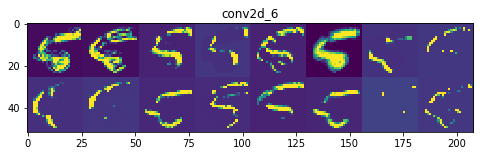

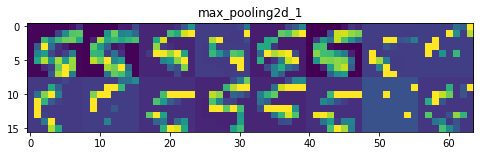

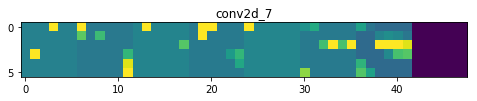

In [21]:
activations = activation_model.predict(x_test[8].reshape(1,28,28,1))
visualize_layers(activations)

In [22]:
activations[2].shape

(1, 6, 6, 8)

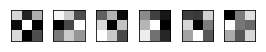

In [23]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
# plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
        # show the figure
plt.show()

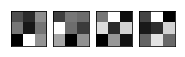

In [24]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 4, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
# plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
        # show the figure
plt.show()

In [25]:

from sklearn.decomposition import PCA

In [26]:
x_viz = (x_test/255).reshape(-1,784)

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_viz)

In [28]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.10047663  0.07544487]


In [29]:
import pandas as pd
df = pd.DataFrame()
a=np.array([np.where(x==1)[0][0] for x in y_test])
df['y'] = a
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

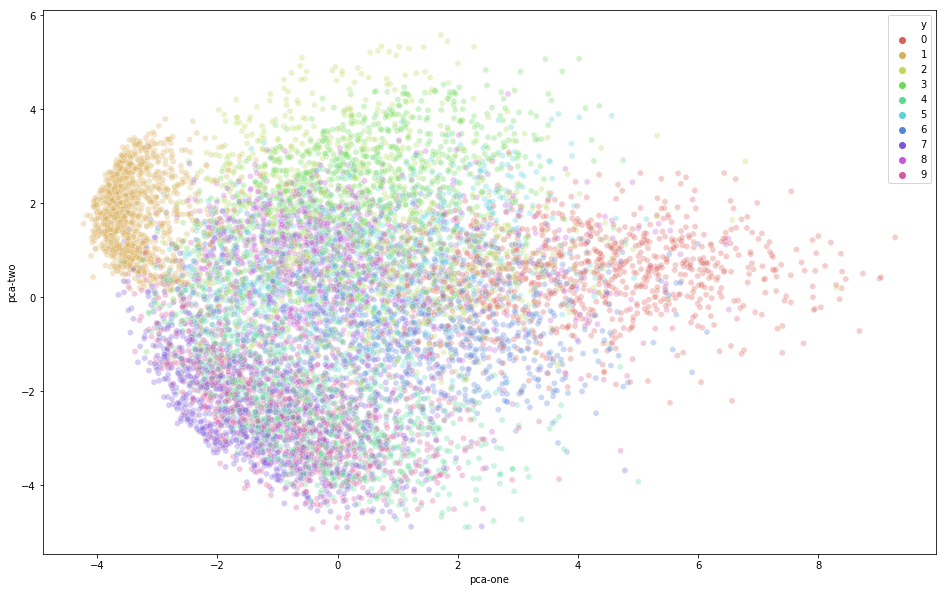

In [30]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

In [31]:
activations = activation_model.predict(x_test, batch_size=128)

In [32]:
a=np.array([np.where(x==1)[0][0] for x in y_test])

In [33]:
a.shape

(10000,)

Explained variation per principal component: [ 0.11084563  0.07984512]


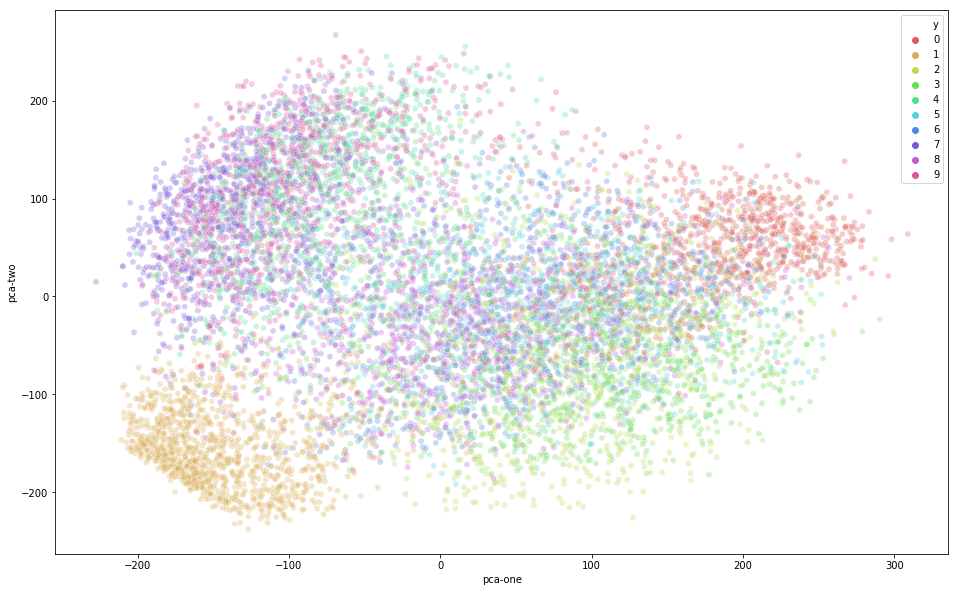

In [34]:
layer2 = activations[1].reshape(10000,-1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(layer2)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

Explained variation per principal component: [ 0.10922309  0.07896078]


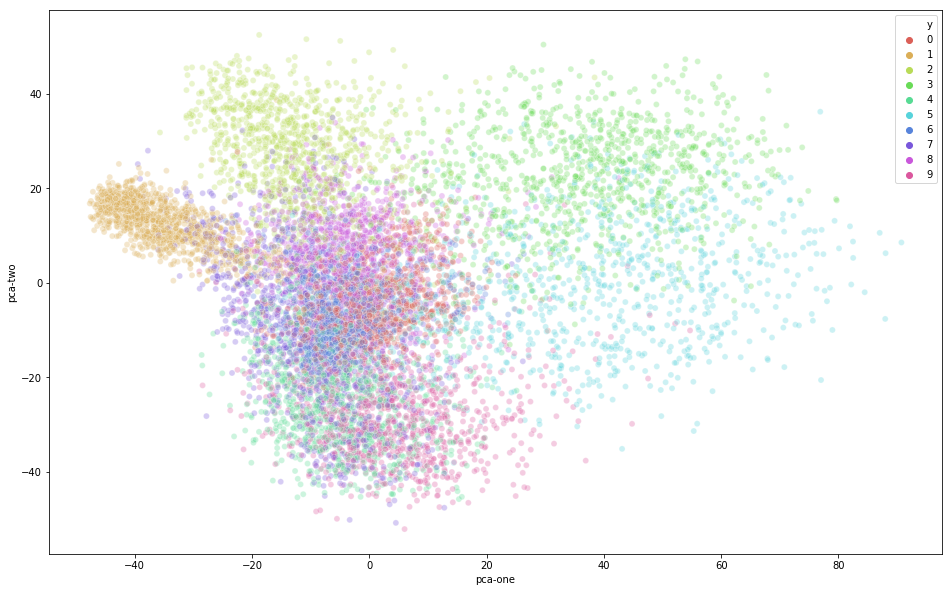

In [35]:
layer3 = activations[2].reshape(10000,-1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(layer3)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_viz)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.263s...
[t-SNE] Computed neighbors for 10000 samples in 279.571s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.129212
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.918327
[t-SNE] KL divergence after 300 iterations: 2.782151


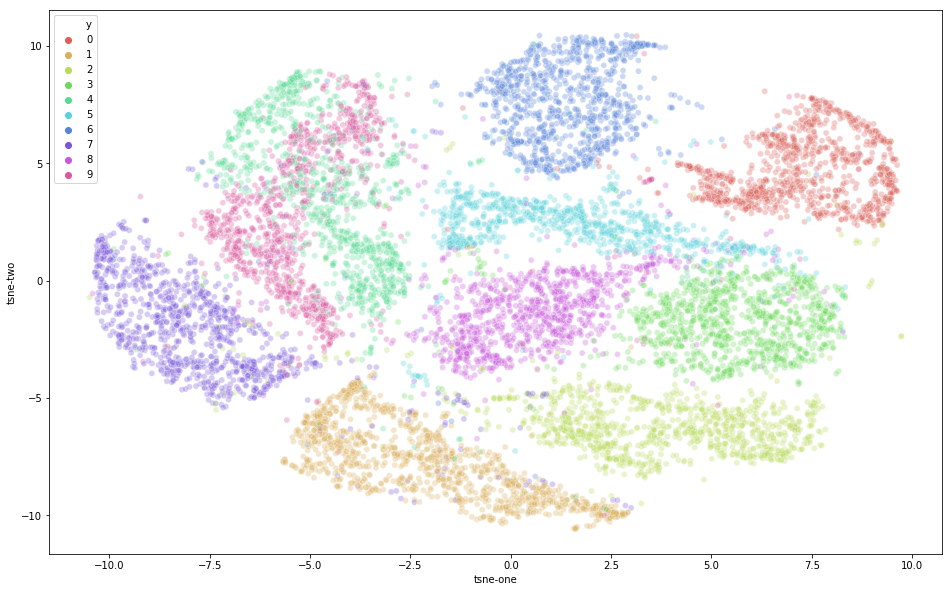

In [38]:
df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1] 

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.889s...
[t-SNE] Computed neighbors for 10000 samples in 398.488s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 86.548501
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.716461
[t-SNE] KL divergence after 300 iterations: 2.706151


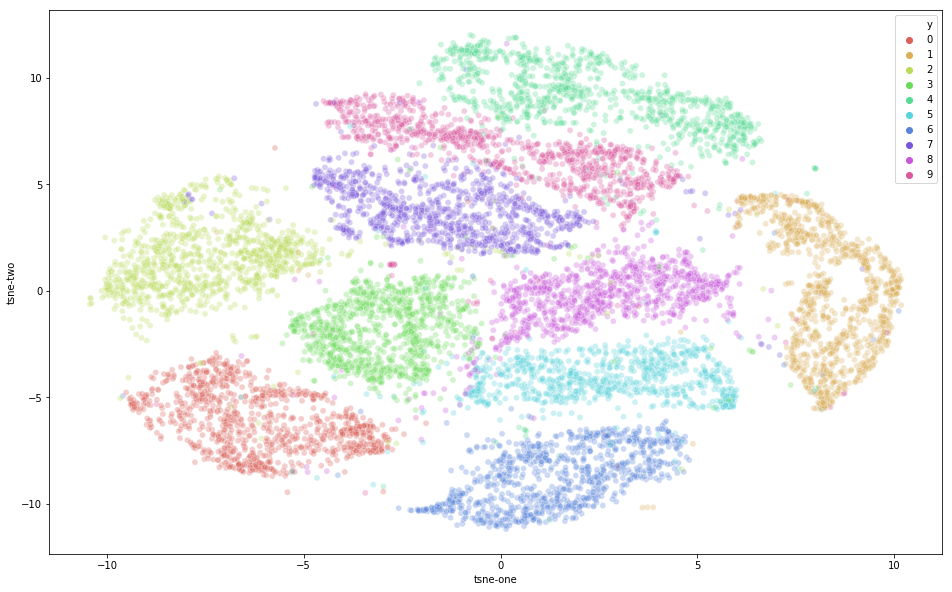

In [39]:
layer2 = activations[1].reshape(10000,-1)
tsne_results = tsne.fit_transform(layer2)

df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1] 

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.488s...
[t-SNE] Computed neighbors for 10000 samples in 104.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 15.958629
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.994484
[t-SNE] KL divergence after 300 iterations: 2.626984


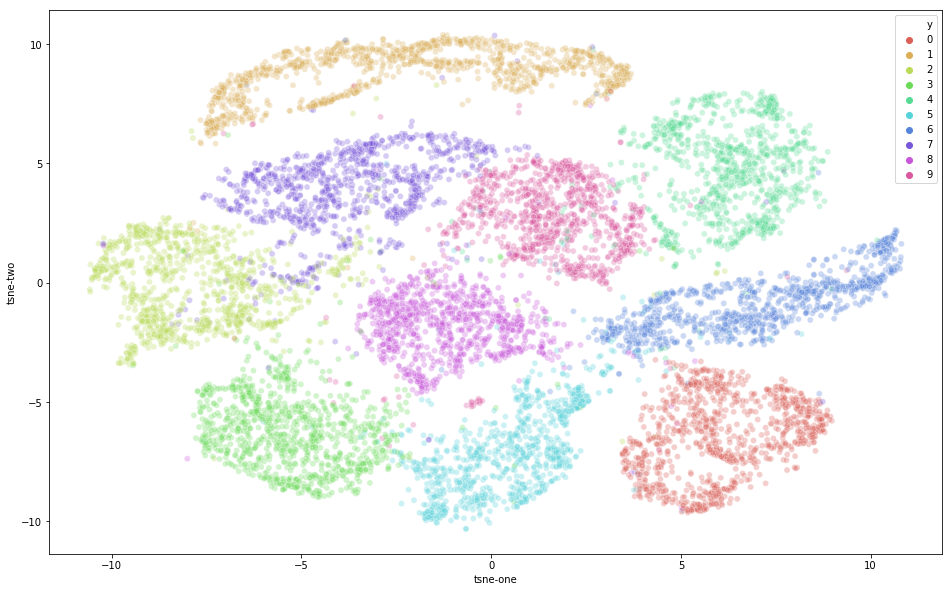

In [40]:
layer3 = activations[2].reshape(10000,-1)
tsne_results = tsne.fit_transform(layer3)

df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1] 

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()